In [1]:
import numpy as np
import pandas as pd 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.storagelevel import StorageLevel
import pyspark.sql 
from pyspark.sql import SQLContext
from pyspark.sql.functions import * 
from pyspark.sql.types import StructType, StructField, IntegerType, StringType,FloatType
from pyspark.sql.types import Row

In [2]:
sc = SparkContext(master = "local", appName = "Choreograph") 
sqlContext = SQLContext(sc)

C:\Desarrollo\Study\choreograph\venv\lib\site-packages\pyspark\sql\context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [3]:
#iris = pd.read_csv('data/iris.data')
#iris.head(5)

irisRDDSchema = StructType(
    [
     StructField("sepal_length",FloatType(),False),
     StructField("sepal_width",FloatType(),False),
     StructField("petal_length",FloatType(),False),
     StructField("petal_width",FloatType(),False),
     StructField("Name",StringType(),False)
    ])

irisDF = sqlContext.read.schema(irisRDDSchema).option("header","true").csv('data/iris.data')

In [4]:
irisDF.show(5)

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|       Name|
+------------+-----------+------------+-----------+-----------+
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



# Simple model

In [5]:
from pyspark.sql import functions as f

irisDF = irisDF.withColumn('Target', f.when(f.col('Name') == 'Iris-setosa', 0).otherwise(f.when(f.col('Name') == 'Iris-versicolor', 1).otherwise(f.when(f.col('Name') == 'Iris-virginica', 2))))

In [6]:
irisDF.show(5)

+------------+-----------+------------+-----------+-----------+------+
|sepal_length|sepal_width|petal_length|petal_width|       Name|Target|
+------------+-----------+------------+-----------+-----------+------+
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|     0|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|     0|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|     0|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|     0|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|     0|
+------------+-----------+------------+-----------+-----------+------+
only showing top 5 rows



In [7]:
irisDF.printSchema()

root
 |-- sepal_length: float (nullable = true)
 |-- sepal_width: float (nullable = true)
 |-- petal_length: float (nullable = true)
 |-- petal_width: float (nullable = true)
 |-- Name: string (nullable = true)
 |-- Target: integer (nullable = true)



In [8]:
irisPDF = irisDF.toPandas()

In [9]:
irisPDF

,sepal_length,sepal_width,petal_length,petal_width,Name,Target
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica,2
145,6.3,2.5,5.0,1.9,Iris-virginica,2
146,6.5,3.0,5.2,2.0,Iris-virginica,2
147,6.2,3.4,5.4,2.3,Iris-virginica,2


In [10]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = irisPDF[feature_cols]
y_iris = irisPDF['Target']

In [11]:
x.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [12]:
y_iris.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

Text(0, 0.5, 'Petal Width')

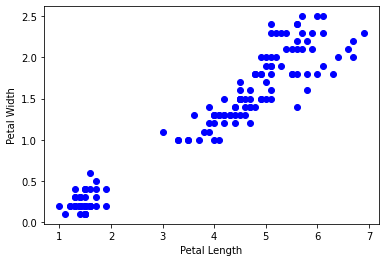

In [13]:
plt.scatter(x['petal_length'], x['petal_width'], c = 'blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

In [14]:
# El número de centroides es 3 ya que ele accuracy es mayor
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(x)
y_labels = model.labels_

In [15]:
y_kmeans = model.predict(x)
print('Predicciones ', y_kmeans)

Predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0 0
 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0
 2]


In [16]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(y_iris, y_kmeans)
print(accuracy)

0.7266293901799755


Text(0, 0.5, 'Petal Width')

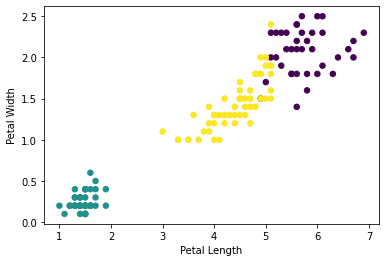

In [17]:
plt.scatter(x['petal_length'], x['petal_width'], c= y_kmeans, s = 30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

In [18]:
cnf_matrix = metrics.confusion_matrix(y_iris, y_kmeans)
cnf_matrix

array([[ 0, 49,  0],
       [ 2,  0, 48],
       [36,  0, 14]], dtype=int64)

Text(33.0, 0.5, 'Prediction label')

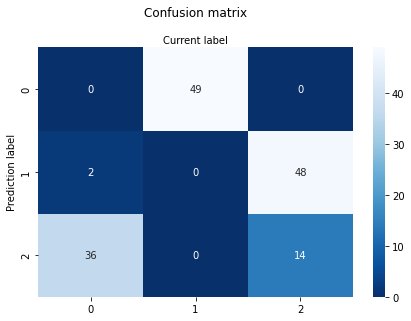

In [19]:
class_names = [1, 2, 3] # Valores a mostrar
fig, ax = plt.subplots() # Dibujamos la gráfica
tick_marks = np.arange(len(class_names)) # Muestra la información en la gráfica 
plt.xticks(tick_marks, class_names) # Dibuja en X
plt.yticks(tick_marks, class_names) # Diguja en Y
# La matriz de confusión se muestra con un heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.xlabel('Current label')
plt.ylabel('Prediction label')

# With additional columns

In [20]:
irisDF = irisDF.withColumn('random1', round(rand()*(100-1)+1))
irisDF = irisDF.withColumn('random2', round(rand()*(100-1)+1))

In [21]:
irisDF.show(5)

+------------+-----------+------------+-----------+-----------+------+-------+-------+
|sepal_length|sepal_width|petal_length|petal_width|       Name|Target|random1|random2|
+------------+-----------+------------+-----------+-----------+------+-------+-------+
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|     0|   35.0|   53.0|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|     0|   13.0|   74.0|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|     0|   19.0|   60.0|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|     0|   53.0|   38.0|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|     0|    5.0|   99.0|
+------------+-----------+------------+-----------+-----------+------+-------+-------+
only showing top 5 rows



In [22]:
irisDF.printSchema()

root
 |-- sepal_length: float (nullable = true)
 |-- sepal_width: float (nullable = true)
 |-- petal_length: float (nullable = true)
 |-- petal_width: float (nullable = true)
 |-- Name: string (nullable = true)
 |-- Target: integer (nullable = true)
 |-- random1: double (nullable = true)
 |-- random2: double (nullable = true)



In [23]:
irisPDF = irisDF.toPandas()

In [24]:
irisPDF

,sepal_length,sepal_width,petal_length,petal_width,Name,Target,random1,random2
0,4.9,3.0,1.4,0.2,Iris-setosa,0,35.0,53.0
1,4.7,3.2,1.3,0.2,Iris-setosa,0,13.0,74.0
2,4.6,3.1,1.5,0.2,Iris-setosa,0,19.0,60.0
3,5.0,3.6,1.4,0.2,Iris-setosa,0,53.0,38.0
4,5.4,3.9,1.7,0.4,Iris-setosa,0,5.0,99.0
...,...,...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica,2,69.0,53.0
145,6.3,2.5,5.0,1.9,Iris-virginica,2,69.0,77.0
146,6.5,3.0,5.2,2.0,Iris-virginica,2,49.0,72.0
147,6.2,3.4,5.4,2.3,Iris-virginica,2,43.0,78.0


In [25]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'random1', 'random2']
x = irisPDF[feature_cols]
y_iris = irisPDF['Target']

In [26]:
x.head(5)

,sepal_length,sepal_width,petal_length,petal_width,random1,random2
0,4.9,3.0,1.4,0.2,35.0,53.0
1,4.7,3.2,1.3,0.2,13.0,74.0
2,4.6,3.1,1.5,0.2,19.0,60.0
3,5.0,3.6,1.4,0.2,53.0,38.0
4,5.4,3.9,1.7,0.4,5.0,99.0


In [27]:
# El número de centroides es 3 ya que ele accuracy es mayor
model = KMeans(n_clusters = 3, max_iter = 1000)
model.fit(x)
y_labels = model.labels_

In [28]:
y_kmeans = model.predict(x)
print('Predicciones ', y_kmeans)

Predicciones  [2 0 0 2 0 1 1 1 0 0 2 1 0 0 2 0 1 2 0 2 0 1 2 1 1 0 0 1 2 1 2 0 1 1 2 1 0
 0 1 0 0 1 0 1 2 2 0 2 1 2 1 2 2 2 1 1 1 0 2 0 0 1 0 2 1 1 0 0 1 0 2 1 1 2
 0 0 0 2 0 1 0 2 1 1 2 1 0 1 2 2 1 2 2 1 1 2 0 2 0 0 2 2 2 2 1 2 2 1 0 0 1
 1 1 2 2 2 2 2 1 2 1 1 1 2 0 2 2 2 2 1 0 2 1 2 1 0 2 0 2 0 1 0 2 0 1 1 0 0
 1]


In [29]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(y_iris, y_kmeans)
print(accuracy)

0.00011023687147758746


Text(0, 0.5, 'Petal Width')

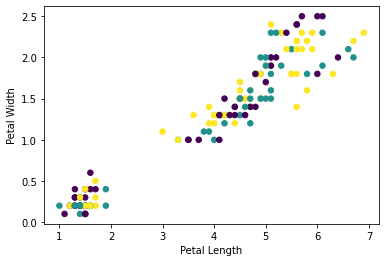

In [30]:
plt.scatter(x['petal_length'], x['petal_width'], c= y_kmeans, s = 30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

In [31]:
cnf_matrix = metrics.confusion_matrix(y_iris, y_kmeans)
cnf_matrix

array([[19, 17, 13],
       [15, 18, 17],
       [12, 16, 22]], dtype=int64)

Text(33.0, 0.5, 'Prediction label')

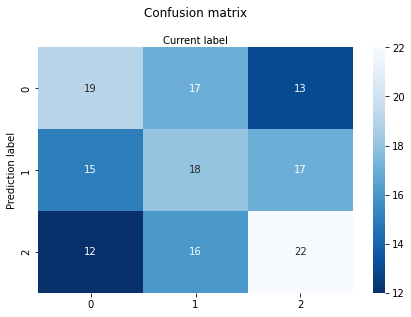

In [32]:
class_names = [1, 2, 3] # Valores a mostrar
fig, ax = plt.subplots() # Dibujamos la gráfica
tick_marks = np.arange(len(class_names)) # Muestra la información en la gráfica 
plt.xticks(tick_marks, class_names) # Dibuja en X
plt.yticks(tick_marks, class_names) # Diguja en Y
# La matriz de confusión se muestra con un heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.xlabel('Current label')
plt.ylabel('Prediction label')

In [33]:
sc.stop()